![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

by Rima Hinnawi - Data Science Foundations 


# PANDAS

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [577]:
import pandas as pd
import matplotlib as plt
import seaborn as sns



df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user" , delimiter = '|' , index_col= 'user_id')
df

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [578]:
df.dropna().describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [579]:
df.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [580]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

## What is the mean age per occupation?

In [581]:
#mean age per occupation

age_by_occ= df.groupby(by="occupation").mean()
age_by_occ

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


## What is the male/female ratio per occupation ?

In [582]:
##create dataframes per gender first and group by occupation and count nunmber of times gender is in each occupation
male_df = df[df['gender'] == 'M'].groupby( by= 'occupation').count()
female_df = df[df['gender'] == 'F'].groupby( by= 'occupation').count()

#concatenate the 2 dataframes 
dfNew= pd.concat([male_df,female_df] , axis=1 )
#set new column names for new dataframe
dfNew.columns = ['m_age', 'm_gender', 'm_zip_code', 'f_age', 'f_gender', 'f_zip_code']
dfNew = dfNew.fillna(0)

#Add new Columns (male_ration and female_ratio) to new data frames 
#And Calculate Values of new Columns
dfNew['male_ratio'] = dfNew['m_age'] / ( dfNew['m_age'] + dfNew['f_age'])
dfNew['female_ratio'] = dfNew['f_age'] / ( dfNew['m_age'] + dfNew['f_age'])




## Male ratio with result sorted:  from the highest to the least occupation 


In [548]:
dfNew.sort_values(by='male_ratio' , ascending= False)

,m_age,m_gender,m_zip_code,f_age,f_gender,f_zip_code,male_ratio,female_ratio
doctor,7,7,7,0.0,0.0,0.0,1.000000,0.000000
engineer,65,65,65,2.0,2.0,2.0,0.970149,0.029851
technician,26,26,26,1.0,1.0,1.0,0.962963,0.037037
retired,13,13,13,1.0,1.0,1.0,0.928571,0.071429
programmer,60,60,60,6.0,6.0,6.0,0.909091,0.090909
executive,29,29,29,3.0,3.0,3.0,0.906250,0.093750
scientist,28,28,28,3.0,3.0,3.0,0.903226,0.096774
entertainment,16,16,16,2.0,2.0,2.0,0.888889,0.111111
lawyer,10,10,10,2.0,2.0,2.0,0.833333,0.166667
salesman,9,9,9,3.0,3.0,3.0,0.750000,0.250000


## Female ratio with result sorted:  from the highest to the least occupation 

In [583]:
dfNew.sort_values(by='female_ratio' , ascending= False)


,m_age,m_gender,m_zip_code,f_age,f_gender,f_zip_code,male_ratio,female_ratio
homemaker,1,1,1,6.0,6.0,6.0,0.142857,0.857143
healthcare,5,5,5,11.0,11.0,11.0,0.312500,0.687500
librarian,22,22,22,29.0,29.0,29.0,0.431373,0.568627
artist,15,15,15,13.0,13.0,13.0,0.535714,0.464286
administrator,43,43,43,36.0,36.0,36.0,0.544304,0.455696
none,5,5,5,4.0,4.0,4.0,0.555556,0.444444
writer,26,26,26,19.0,19.0,19.0,0.577778,0.422222
marketing,16,16,16,10.0,10.0,10.0,0.615385,0.384615
other,69,69,69,36.0,36.0,36.0,0.657143,0.342857
student,136,136,136,60.0,60.0,60.0,0.693878,0.306122


## For each occupation, calculate the minimum age

In [584]:
#group by occupation and show minimum age for each occupation 
min_age_by_occ= df.groupby(by= "occupation").min()
min_age_by_occ

,age,gender,zip_code
occupation,,,
administrator,21,F,02154
artist,19,F,01945
doctor,28,M,47401
educator,23,F,01602
engineer,22,F,00000
entertainment,15,F,01040
executive,22,F,00000
healthcare,22,F,02154
homemaker,20,F,17331


## For each occupation, calculate the maximum age

In [585]:
#group by occupation and show maximum age for each occupation  
max_age_by_occ= df.groupby(by="occupation").max()
max_age_by_occ

,age,gender,zip_code
occupation,,,
administrator,70,M,V1G4L
artist,48,M,V5A2B
doctor,64,M,97405
educator,63,M,M4J2K
engineer,70,M,T8H1N
entertainment,50,M,V3N4P
executive,69,M,L1V3W
healthcare,62,M,97232
homemaker,50,M,96349


## For each combination of occupation and gender, calculate the mean age

In [586]:
#below is mean age grouped by profession and gender 
df.groupby(["occupation", "gender"]).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

## For each occupation present the percentage of women and men



In [587]:
#group by total count in each category first before calculating percentage 
by_count= df.groupby(["occupation", "gender"])['age'].count()
by_count

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [589]:
#Calculate percentages here
by_percentage= by_count / by_count.groupby(level=0).sum()
by_percentage

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

In [590]:
#Here is another way to show results (showing dataframe)
#using the calculations that were done in the beginning of this exercise
#For each occupation present the percentage of women and men
ratioDF = dfNew[['male_ratio','female_ratio']]
ratioDF

,male_ratio,female_ratio
administrator,0.544304,0.455696
artist,0.535714,0.464286
doctor,1.000000,0.000000
educator,0.726316,0.273684
engineer,0.970149,0.029851
entertainment,0.888889,0.111111
executive,0.906250,0.093750
healthcare,0.312500,0.687500
homemaker,0.142857,0.857143
lawyer,0.833333,0.166667


<AxesSubplot:>

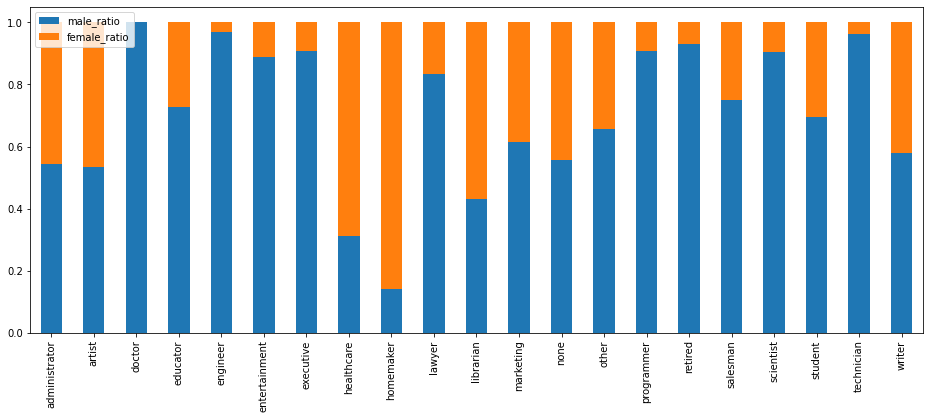

In [592]:
ratioDF.plot(figsize=(16,6), kind='bar', stacked=True)

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv")
data

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


## What is the type of the columns?

In [2]:
data.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

## Convert the type of the column Year to datetime64

In [3]:
#convert to datetime
data['Year']=pd.to_datetime(data['Year'], format='%Y')
#data['Year'] =  pd.to_datetime(data['Year'])
#now check data types again 
#Year is now datetime64
data.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

## Set the Year column as the index of the dataframe

In [4]:
data.set_index('Year', inplace=True)

In [5]:
#lets verify it was set properly
data.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype

## Delete the Total column


In [6]:
#delete Total column
data.drop('Total', axis=1, inplace=True)

In [7]:
#now 'Total' is gone. View data again ...
data

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


## Group the year by decades and sum the values (take care with population values)

In [17]:
#Find the decade of every year in dataset
#below is the way to calculate which decade a year is part of 
decade = (data.index.year//10)*10
decade 

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1970,
            1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1980, 1980,
            1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1990, 1990, 1990,
            1990, 1990, 1990, 1990, 1990, 1990, 1990, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Year')

In [31]:
#below we see all the decades we have in the dataset
#we now know that we have 6 decades in our dataset
decade.unique()

Int64Index([1960, 1970, 1980, 1990, 2000, 2010], dtype='int64', name='Year')

In [30]:
# now group by decade
# this way of calculating returns a dataframe with the population totals
group_by_decade= data.groupby(decade).aggregate({'Population':sum})
group_by_decade


,Population
Year,
1960,1915053175
1970,2121193298
1980,2371370069
1990,2612825258
2000,2947969117
2010,1570146307


In [39]:
##returns series of same result above ... just different way to calculate the results
group_by_decade_series= data.groupby(decade)['Population'].sum()
group_by_decade_series

Year
1960    1915053175
1970    2121193298
1980    2371370069
1990    2612825258
2000    2947969117
2010    1570146307
Name: Population, dtype: int64

In [32]:
#below is a different way to group by decade
data.resample('10AS')['Population'].sum()

Year
1960-01-01    1915053175
1970-01-01    2121193298
1980-01-01    2371370069
1990-01-01    2612825258
2000-01-01    2947969117
2010-01-01    1570146307
Freq: 10AS-JAN, Name: Population, dtype: int64

In [38]:
#testing here to see if numbers above are correct by summing the population in the 1960s
data[0:10].aggregate({'Population':sum})

Population    1915053175
dtype: int64

## What is the most dangerous decade to live in the US?

In [48]:
#we can sort the result disovered above  and the top item in dataframe has the result
group_by_decade_sorted= group_by_decade.sort_values(by="Population", ascending=False)
group_by_decade_sorted

,Population
Year,
2000,2947969117
1990,2612825258
1980,2371370069
1970,2121193298
1960,1915053175
2010,1570146307


# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

## Load "tips.csv" it in Pandas

In [27]:

#had to change: "blob" to "raw" to open:  https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv
tipdata = pd.read_csv("https://github.com/vfp1/bts-dsf-2020/raw/main/data/tips.csv")
tipdata

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:


In [30]:
import pandas as pd
import numpy as np
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass


In [31]:
#save the csv file in tipdata.db . It will create it and save it 
cnx = sqlite3.connect('tipdata.db')
tipdata.to_sql(name='tipdata', con=cnx)

### Who is most likely to receive a tip during weekday? A Female or a Male?

In [390]:
#First, we need to connect to database by calling function created above passing new database name

connection, cursor = create_connect_database('tipdata.db')

#get the tables in the db
cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('tipdata',)]


In [391]:
#above results show that 'tipsdata' is only table in tipsdata.db
#Now, lets get, using pandas logic, the tables in the columns in the tipsdata table
#The result returned are the column names

for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)


Table name tipdata
['index', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [392]:
#Now lets get numnber of rows in table
for table in tables:
    num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    values = num_rows.fetchone()
    print("Table", table[0], "contains", values[0], "rows")

Table tipdata contains 244 rows


In [393]:
#the result from is total number of rows return through sql is 244 
#244 corresponds to the number of rows in the tipsdata dataframe created above from tips.csv file

#Now lets select results from tipsdata table

# We need to find out who is most likely to receive a tip during weekday: Female or a Male
# The following query gets us total tips grouped by female and male (not by weekend or weekday)...
tips_by_gender = pd.read_sql_query("SELECT sex, count(*) as tiptotal FROM tipdata GROUP BY sex;", connection)
tips_by_gender

,sex,tiptotal
0,Female,87
1,Male,157


In [395]:
# the following query returns tips per day of the week per female and male

#the result from is total number of rows return through sql is 244 
#244 corresponds to the number of rows in the tipsdata dataframe created above from tips.csv file

#Now lets select results from tipsdata table

# We need to find out who is most likely to receive a tip during weekday: Female or a Male
# The following query gets us total tips grouped by female and male (not by weekend or weekday)...
tips_by_gender_and_day = pd.read_sql_query("SELECT sex, day, COUNT(*) as tiptotal FROM tipdata GROUP BY sex, day;", connection)



In [396]:
#now we can use some pandas logic -- a few steps--to get total tips per gender and per day separated
#lets print the data frame that has total tips sorted by 
tips_by_gender_and_day

,sex,day,tiptotal
0,Female,Fri,9
1,Female,Sat,28
2,Female,Sun,18
3,Female,Thur,32
4,Male,Fri,10
5,Male,Sat,59
6,Male,Sun,58
7,Male,Thur,30


In [397]:
#which days of week are in the entire dataframe /dataset?
day= tipdata['day'].unique()
day

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [398]:
#lets print all the results by row to verify what we have ...
by_day_type= tips_by_gender_and_day['day']
by_day_type

0     Fri
1     Sat
2     Sun
3    Thur
4     Fri
5     Sat
6     Sun
7    Thur
Name: day, dtype: object

In [399]:
#when it is Thursday set it to weekday otherwise set to weekend (we do not need to deal with other weekdays here)

weekend = np.where(by_day_type == 'Thur', 'Weekday', 'Weekend')
weekend

array(['Weekend', 'Weekend', 'Weekend', 'Weekday', 'Weekend', 'Weekend',
       'Weekend', 'Weekday'], dtype='<U7')

In [400]:
dfW = pd.DataFrame(weekend, columns = ['TypeOfDay'])
dfW

,TypeOfDay
0,Weekend
1,Weekend
2,Weekend
3,Weekday
4,Weekend
5,Weekend
6,Weekend
7,Weekday


In [401]:
with_type_of_day = pd.merge(tips_by_gender_and_day, dfW, left_index=True, right_index=True)

In [402]:
with_type_of_day

,sex,day,tiptotal,TypeOfDay
0,Female,Fri,9,Weekend
1,Female,Sat,28,Weekend
2,Female,Sun,18,Weekend
3,Female,Thur,32,Weekday
4,Male,Fri,10,Weekend
5,Male,Sat,59,Weekend
6,Male,Sun,58,Weekend
7,Male,Thur,30,Weekday


In [338]:
#now we can get result

In [403]:
tip_by_weekday= with_type_of_day.groupby(["sex","TypeOfDay"])['tiptotal'].sum()
tip_by_weekday

sex     TypeOfDay
Female  Weekday       32
        Weekend       55
Male    Weekday       30
        Weekend      127
Name: tiptotal, dtype: int64

### CONCLUSION  Who is most likely to receive a tip during weekday? 
Answer is : a Female (since on the weekday total for Female is 32, and total for Male is 30)

### Who is most likely to receive a tip during weekend? A Female or a Male?
Answer is : a Male (since on the weekend total for Male is 127, and total for female is 55)

### What is the table size that is most likely to bring a better tip?


In [404]:
tips_by_table = pd.read_sql_query("SELECT size, AVG(tip) as tipavg, COUNT(*)FROM tipdata group by size;", connection)
tips_by_table

,size,tipavg,COUNT(*)
0,1,1.437500,4
1,2,2.582308,156
2,3,3.393158,38
3,4,4.135405,37
4,5,4.028000,5
5,6,5.225000,4


#### Answer: Table 6 has the highest tip average


### Who is  giving more tips, smokers or non smokers?

In [405]:
tips_by_smoker = pd.read_sql_query("SELECT smoker, AVG(tip) as tipavg, COUNT(*)FROM tipdata group by smoker;", connection)
tips_by_smoker



,smoker,tipavg,COUNT(*)
0,No,2.991854,151
1,Yes,3.008710,93


<AxesSubplot:xlabel='smoker'>

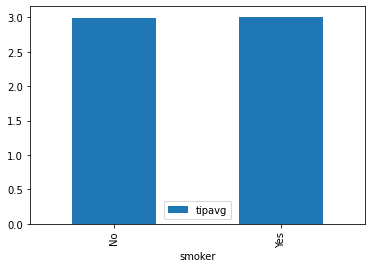

In [406]:
tips_by_smoker.plot.bar(x='smoker', y='tipavg')
 

#### Answer: Tip average is almost the same for non smokers and smokers

In [407]:
#Now that we are done with the tipdata database we can close connection
cursor.close()
connection.close()

## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



In [412]:
#First, we need to connect to database by calling function created above passing new database name

connection, cursor = create_connect_database('flights.db')

#get the tables in the db
cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


In [413]:
#above results show that 'airports' , 'airlines' and 'routes' are the tables in flights.db
#Here all table columns are printed


for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)


Table name airports
['index', 'id', 'name', 'city', 'country', 'code', 'icao', 'latitude', 'longitude', 'altitude', 'offset', 'dst', 'timezone']
Table name airlines
['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
Table name routes
['index', 'airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']


In [414]:
for table in tables:
    num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    values = num_rows.fetchone()
    print("Table", table[0], "contains", values[0], "rows")

Table airports contains 8107 rows
Table airlines contains 6048 rows
Table routes contains 67663 rows


### Which is the country that has the least amount of active airlines?

In [462]:
#query database for airlines that are active
c_active_a = pd.read_sql_query(" SELECT country FROM airlines WHERE active=='Y'", connection)
c_active_a.head(10)


,country
0,None
1,South Africa
2,United States
3,Australia
4,Singapore
5,France
6,United States
7,United States
8,Republic of Korea
9,Pakistan


In [463]:
##sort by the country that has the least active airlines and the answer is : many countries with list below
c_active_a['country'].value_counts().sort_values(ascending=True)

Republic of the Congo      1
Togo                       1
Montenegro                 1
Slovenia                   1
Turkmenistan               1
                        ... 
Canada                    34
Germany                   37
United Kingdom            40
Russia                    72
United States            141
Name: country, Length: 194, dtype: int64

 ### And which is the country that has the most amount of active airlines?

In [464]:
#sort by the country that has the most active airlines and the answer is the united states
c_active_a['country'].value_counts().sort_values(ascending=False)

United States            141
Russia                    72
United Kingdom            40
Germany                   37
Canada                    34
                        ... 
Turkmenistan               1
Slovenia                   1
Montenegro                 1
Togo                       1
Republic of the Congo      1
Name: country, Length: 194, dtype: int64

### Which country has the most airports?

In [465]:
#query database for all countries from airports table
country_airports = pd.read_sql_query(" SELECT country FROM airports", connection)
country_airports


,country
0,Papua New Guinea
1,Papua New Guinea
2,Papua New Guinea
3,Papua New Guinea
4,Papua New Guinea
...,...
8102,Canada
8103,Canada
8104,Canada
8105,United States


In [472]:
#use code to get the country with the most airports. The answer is the United States
country_airports['country'].value_counts().sort_values(ascending=False)

United States              1697
Canada                      435
Germany                     321
Australia                   263
Russia                      249
                           ... 
Christmas Island              1
Gibraltar                     1
Midway Islands                1
Cocos (Keeling) Islands       1
Luxembourg                    1
Name: country, Length: 240, dtype: int64

### Which country has the least number of airports?

In [473]:
# code gets the country with the least number of  airports. 
# Answer is below: There are many airports with just one airport
country_airports['country'].value_counts().sort_values(ascending=True)

Luxembourg                    1
Cocos (Keeling) Islands       1
Midway Islands                1
Gibraltar                     1
Christmas Island              1
                           ... 
Russia                      249
Australia                   263
Germany                     321
Canada                      435
United States              1697
Name: country, Length: 240, dtype: int64

 ### Which country has the most outgoing destinations? 

In [468]:
#query database for country with most outgoing destination. The result is: United States
sql_qry="""SELECT CAST(source_air.country AS TEXT) AS source_country,
                  CAST(destination_air.country AS TEXT) AS destination_country 
           FROM routes INNER JOIN airports source_air
                     ON source_air.id = routes.source_id 
           INNER JOIN airports destination_air ON destination_air.id = routes.dest_id;"""


country_dest= pd.read_sql_query(sql_qry , connection)
country_dest.head()

,source_country,destination_country
0,Russia,Russia
1,Russia,Russia
2,Russia,Russia
3,Russia,Russia
4,Russia,Russia


In [469]:
#code below gets the country with the most destinations. The answer is the United States
country_dest['source_country'].value_counts().sort_values(ascending=False)

United States              13178
China                       8146
United Kingdom              2661
Spain                       2530
Germany                     2353
                           ...  
American Samoa                 1
Lesotho                        1
Tuvalu                         1
Cocos (Keeling) Islands        1
Monaco                         1
Name: source_country, Length: 226, dtype: int64

 ### Which country has the least outgoing destinations? 

In [471]:
#code below gets the country with the least destinations. The answer is many countries
country_dest['source_country'].value_counts().sort_values(ascending=True)


Monaco                         1
Cocos (Keeling) Islands        1
Tuvalu                         1
Lesotho                        1
American Samoa                 1
                           ...  
Germany                     2353
Spain                       2530
United Kingdom              2661
China                       8146
United States              13178
Name: source_country, Length: 226, dtype: int64

In [476]:
#Now that we are done with the flight database we can close connection
cursor.close()
connection.close()

 ### Plot the routes of incoming/outgoing destinations using Geopandas
 Answer in separate notebook 
 

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



### First Kaggle Challenge
Answer in separate notebook 